### Decision Trees and Random Forests
Practice

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


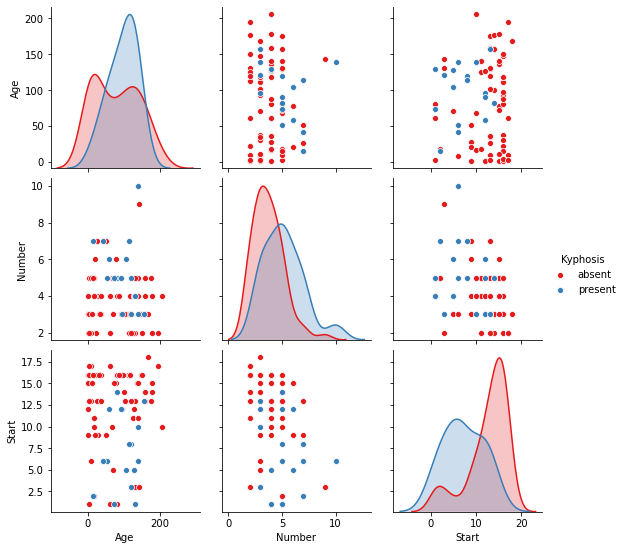

In [4]:
sns.pairplot(df, hue='Kyphosis', palette='Set1')

### Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('Kyphosis', axis = 1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Decision Trees

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
tree = DecisionTreeClassifier()

In [10]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

### Predicition and Evaluation

In [12]:
pred_ = tree.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
print(classification_report(y_test, pred_))
print('\n')
print(confusion_matrix(y_test, pred_))

              precision    recall  f1-score   support

      absent       0.76      0.89      0.82        18
     present       0.50      0.29      0.36         7

    accuracy                           0.72        25
   macro avg       0.63      0.59      0.59        25
weighted avg       0.69      0.72      0.69        25



[[16  2]
 [ 5  2]]


### Tree Vizualization

In [15]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

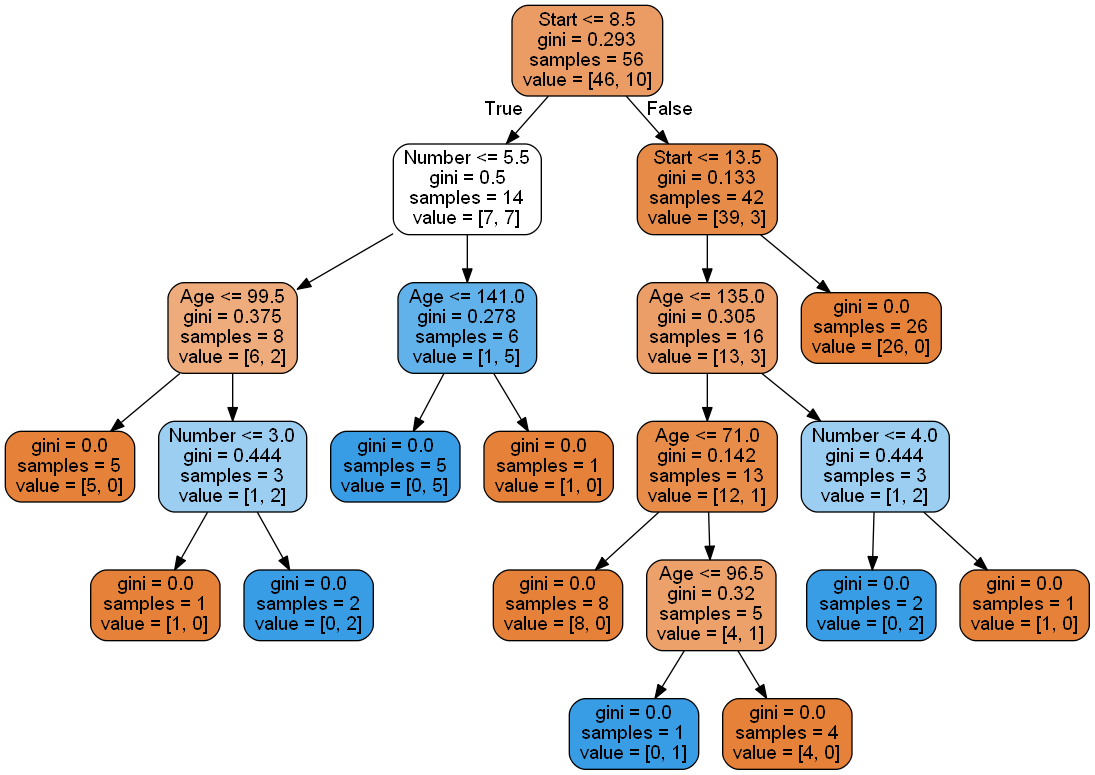

In [17]:
dot_data = StringIO()  
export_graphviz(tree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

### Random Forests

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf = RandomForestClassifier(n_estimators=100)

In [20]:
rf.fit(X_train, y_train)

RandomForestClassifier()

### Predicition and Evaluation

In [21]:
pred_ = rf.predict(X_test)

In [22]:
print(classification_report(y_test, pred_))
print('\n')
print(confusion_matrix(y_test, pred_))

              precision    recall  f1-score   support

      absent       0.75      1.00      0.86        18
     present       1.00      0.14      0.25         7

    accuracy                           0.76        25
   macro avg       0.88      0.57      0.55        25
weighted avg       0.82      0.76      0.69        25



[[18  0]
 [ 6  1]]
